### Data analysis of Section 6 data.

1. Check all 6 surface maps without thermal compensation
1. Check all 6 surface maps with thermal compensation (due to poor thermal condition, we had to use these for optimization)
1. Make T maps for each surface
2. Plot the RB corrections as a function of iteration.
2. Plot bending force RMS as a function of iteration.
2. Spot check the forces applied at each iteration were applied as intended (Gravity+optimized+bending)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.jet()

import sys
sys.path.insert(0, '../')
from M1S_tools import *
import glob

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
## bending modes & influence matrices etc from Buddy #####################
ML actuators =  165 165
Afn =  (6991, 165)
fv =  (165, 165)
U matrix (6991, 165)
N node =  6991
## bending modes & influence matrices etc from Trupti #####################
N actuators =  170
/Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/influnce_matrix_files/OA_influence_matrices_all/OA_surface_normal_165SA_09Jan2025/
Afz =  (27547, 165)
Afx =  (27547, 165)
Afy =  (27547, 165)
U

<Figure size 640x480 with 0 Axes>

In [8]:
ml_data_dir = "/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data/"
dateID = '250110'

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//250110_1/250110 GMT3 set01 1pt2mm burst60 gmtMorph170614 LFSsub comp.h5: Fri Jan 10 10:45:00 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//250110_1/250110 GMT3 set02 1pt2mm burst60 gmtMorph170614 LFSsub comp.h5: Fri Jan 10 10:56:26 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//250110_2/250110 GMT3 set01 iter2 1pt2mm burst60 gmtMorph170614 LFSsub comp.h5: Fri Jan 10 12:19:17 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//250110_2/250110 GMT3 set02 iter2 1pt2mm burst60 gmtMorph170614 LFSsub comp.h5: Fri Jan 10 12:36:26 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//250110_3/250110 GMT3 set01 iter3 1pt2mm burst60 gmtMorph170614 LFSsub comp.h5: Fri Jan 10 13:05:11 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//250110_3/250110 GMT3 set02 iter3 1pt2mm burst60 gmtMorph170614 LFSsub comp.h5: Fri Jan 10 13:14:17 2025 
/Users/bxi

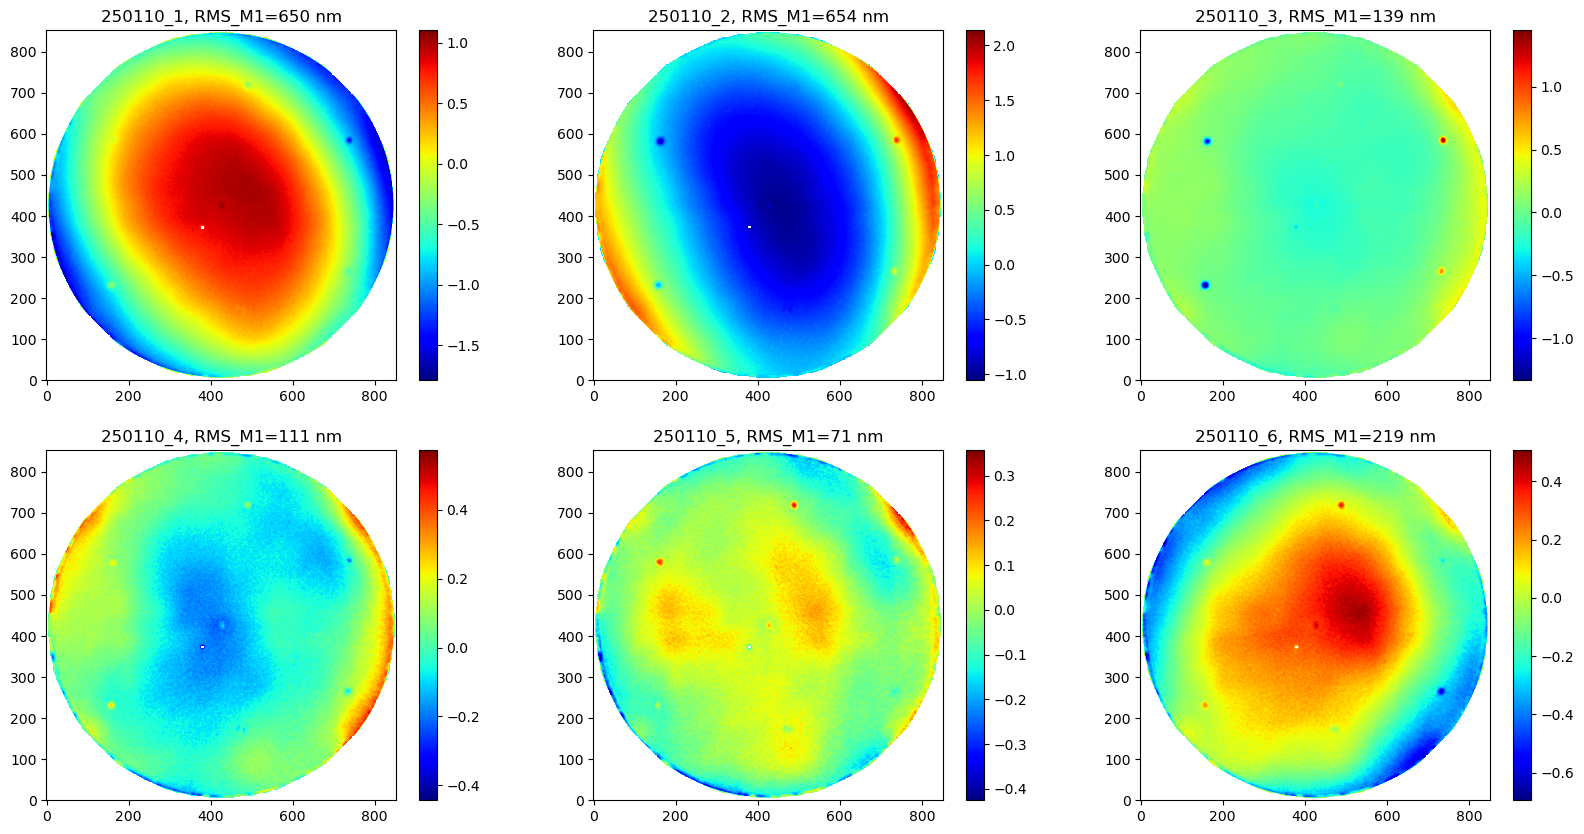

In [21]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
for i in range(6):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    
    fileset = sorted(glob.glob('%s/%s_%s/%s*set*comp.h5'%(ml_data_dir,dateID, i+1, dateID)))
    if len(fileset)>0:
        m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

        m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
        img = ax[irow][icol].imshow(m1s, origin='lower')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title('%s_%s, RMS_M1=%.0f nm'%(dateID,i+1, m1rms))

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//250110_1/250110 GMT3 set01 1pt2mm burst60 gmtMorph170614 LFSsub.h5: Fri Jan 10 10:45:00 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//250110_1/250110 GMT3 set02 1pt2mm burst60 gmtMorph170614 LFSsub.h5: Fri Jan 10 10:56:26 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//250110_2/250110 GMT3 set01 iter2 1pt2mm burst60 gmtMorph170614 LFSsub.h5: Fri Jan 10 12:19:17 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//250110_2/250110 GMT3 set02 iter2 1pt2mm burst60 gmtMorph170614 LFSsub.h5: Fri Jan 10 12:36:26 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//250110_3/250110 GMT3 set01 iter3 1pt2mm burst60 gmtMorph170614 LFSsub.h5: Fri Jan 10 13:05:11 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//250110_3/250110 GMT3 set02 iter3 1pt2mm burst60 gmtMorph170614 LFSsub.h5: Fri Jan 10 13:14:17 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_da

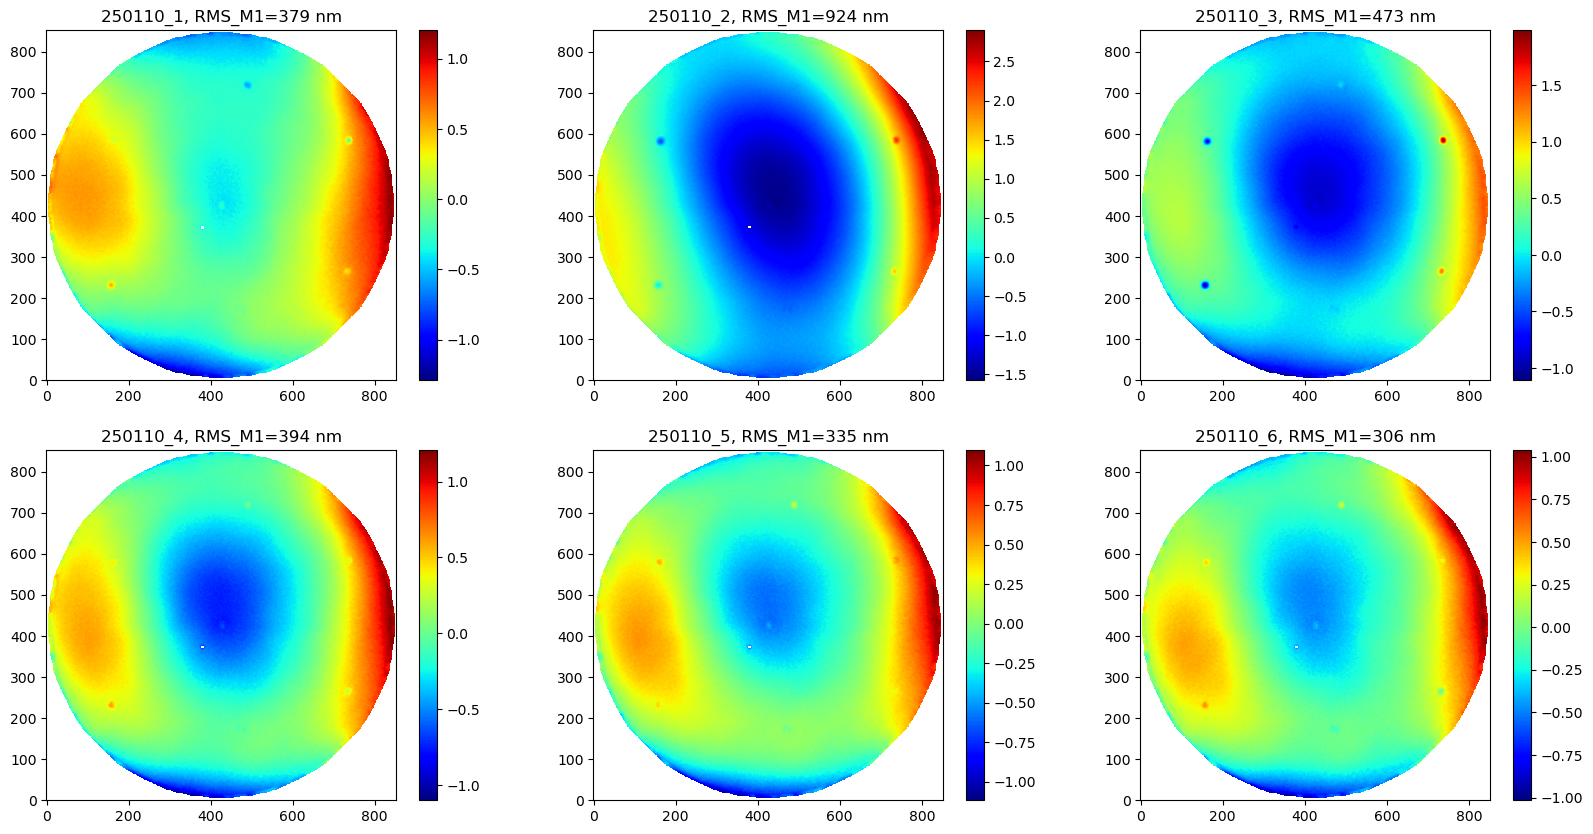

In [22]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
for i in range(6):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    
    fileset = sorted(glob.glob('%s/%s_%s/%s*set*sub.h5'%(ml_data_dir,dateID, i+1, dateID)))
    if len(fileset)>0:
        m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

        m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
        img = ax[irow][icol].imshow(m1s, origin='lower')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title('%s_%s, RMS_M1=%.0f nm'%(dateID,i+1, m1rms))

----------------   Fri Jan 10 14:04:57 2025
m1_s1_thermal_ctrl/i/tc_temperature/value
2025-01-10 14:04:57  duration =  100  s
(1, 6, 32)
(1, 192)
----------------   Fri Jan 10 14:14:09 2025
m1_s1_thermal_ctrl/i/tc_temperature/value
2025-01-10 14:14:09  duration =  100  s
(1, 6, 32)
(1, 192)
----------------   Fri Jan 10 15:20:38 2025
m1_s1_thermal_ctrl/i/tc_temperature/value
2025-01-10 15:20:38  duration =  100  s
(1, 6, 32)
(1, 192)
----------------   Fri Jan 10 15:30:47 2025
m1_s1_thermal_ctrl/i/tc_temperature/value
2025-01-10 15:30:47  duration =  100  s
(1, 6, 32)
(1, 192)


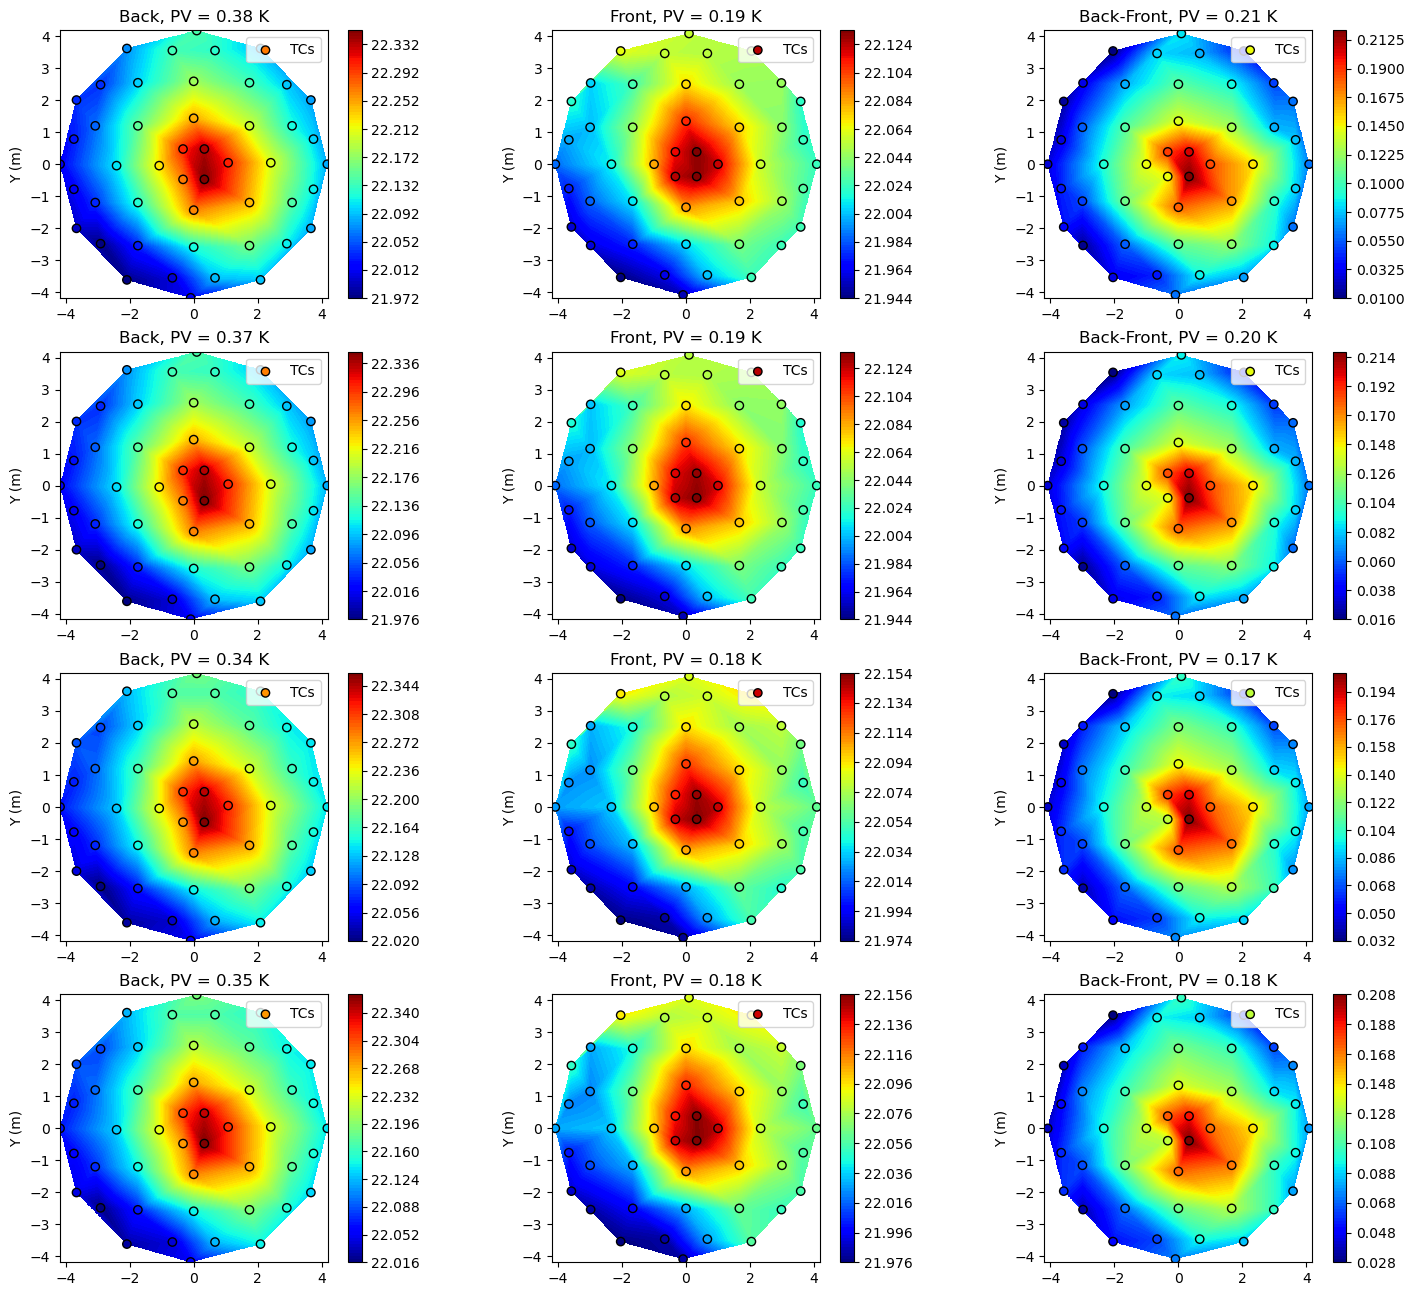

In [72]:
showTMaps(["Fri Jan 10 14:04:57 2025", "Fri Jan 10 14:14:09 2025", 
           "Fri Jan 10 15:20:38 2025", "Fri Jan 10 15:30:47 2025"])